# Calories Burnt Prediction

### Problem Statement:-

In this project, we are going to predict how many calories burnt down during the exercise. We face this problem in our day to day life regularly a lot of people are very interested in the exercise that they do and the diet that they take and what is the amount of calories associated with. for example, how many calories do they burn when they do exercise.

Data can be found at :- https://www.kaggle.com/fmendes/fmendesdat263xdemos

#### First we identifies the following customer variables to study:
    * User ID
    * Gender
    * Age
    * Height 
    * Weight 
    * Duration
    * Heart Rate
    * Body Temperature
    * Calories

### Steps

# Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
# Data Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Read & Load Data

In [2]:
data_1=pd.read_csv("Data//calories.csv")

In [3]:
data_1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
data_2=pd.read_csv("Data//exercise.csv")

In [5]:
data_2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### Adding two Dataframes

In [6]:
data = pd.concat([data_2, data_1['Calories']], axis=1)

In [7]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Data Inspection

In [8]:
data.shape

(15000, 9)

In [9]:
data.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Exploratory Data Analysis 

## Data Pre Processing

### Finding missing values

In [12]:
data.isna().sum().sort_values(ascending=False)

Calories      0
Body_Temp     0
Heart_Rate    0
Duration      0
Weight        0
Height        0
Age           0
Gender        0
User_ID       0
dtype: int64

#### There is no missing values in Dataset

In [13]:
data[data.duplicated()]
# no duplicate values

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


## Outliers

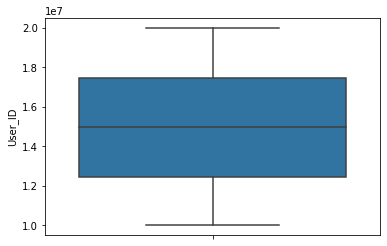

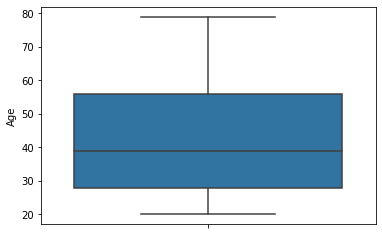

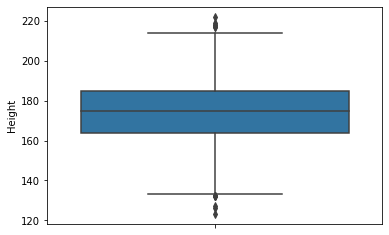

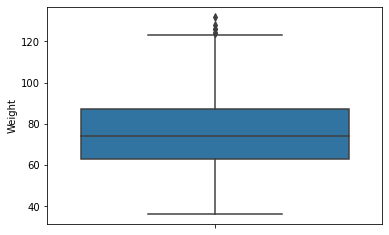

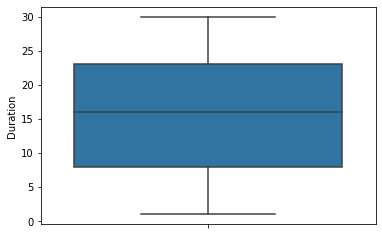

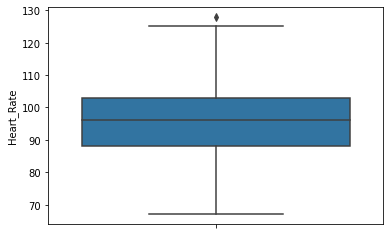

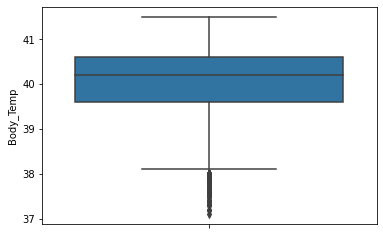

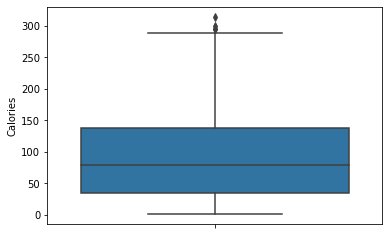

In [14]:
for x in data.columns:
    if data[x].dtypes != 'object':
        sns.boxplot(y=data[x])
        plt.show()

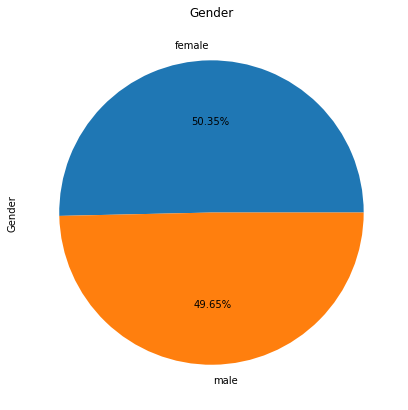

In [15]:
plt.figure(figsize=(7,7))
data["Gender"].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Gender")
plt.show()

## Label Encoding

In [16]:
colname=[]
for x in data.columns:
    if data[x].dtypes == 'object':
        colname.append(x)
colname

['Gender']

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname:
    data[x] = le.fit_transform(data[x])

In [18]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Analysis

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Body_Temp'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

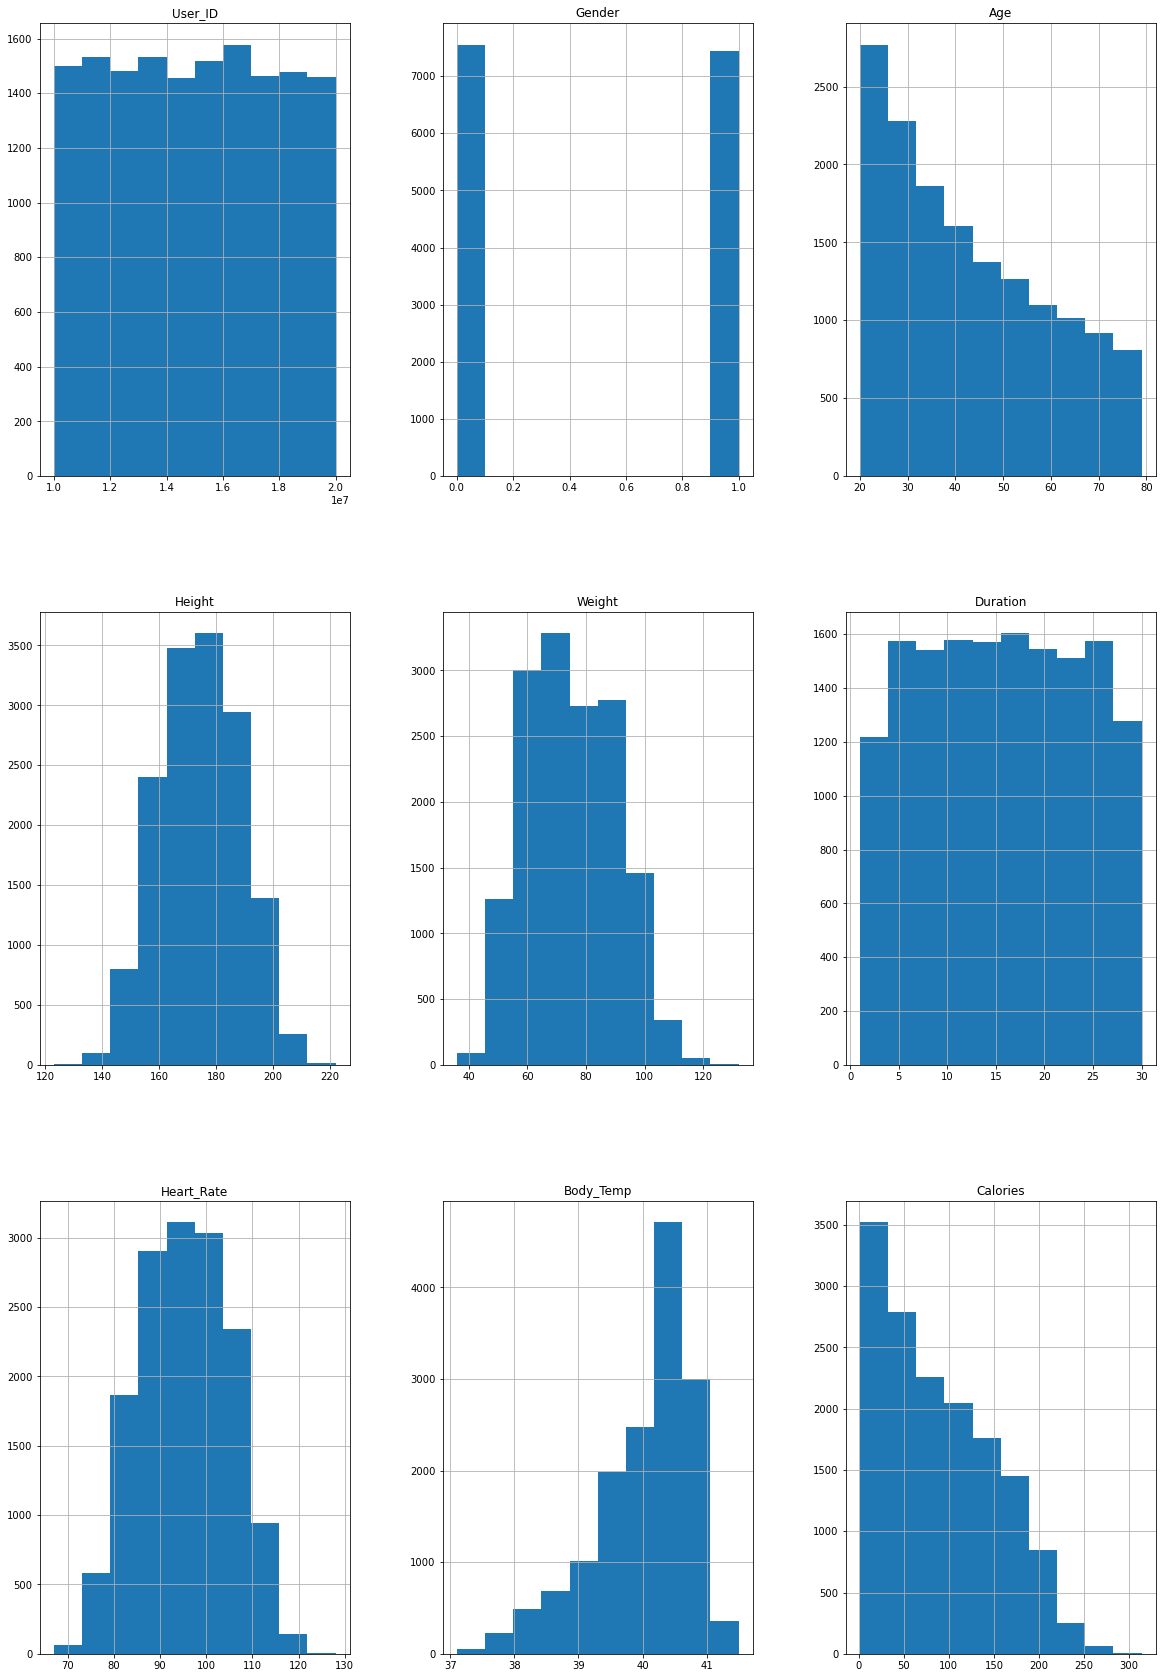

In [19]:
%matplotlib inline

data.hist(figsize=(20,30))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

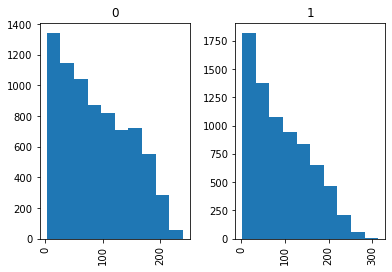

In [20]:
data.hist(by='Gender',column = 'Calories')

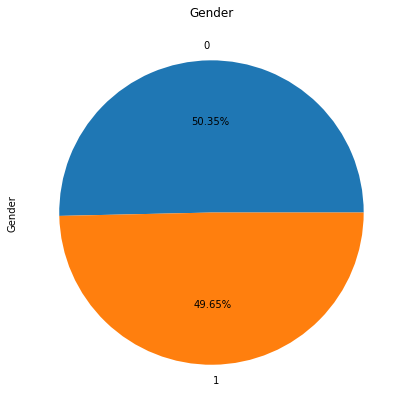

In [21]:
plt.figure(figsize=(7,7))
data["Gender"].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Gender")
plt.show()

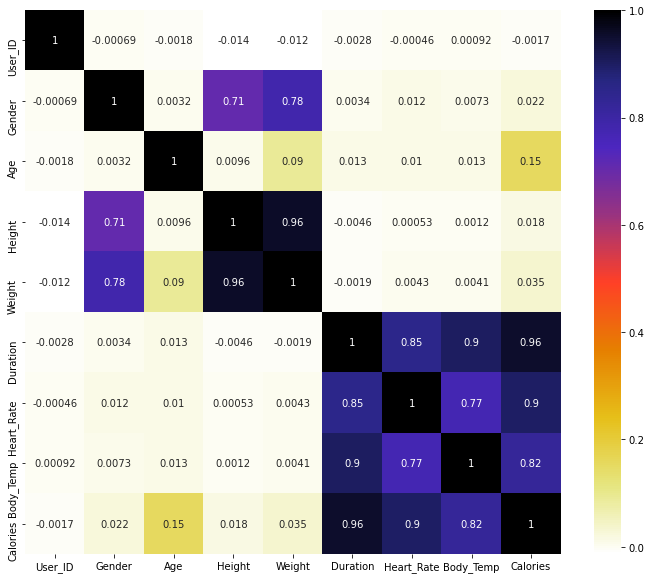

In [22]:
plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

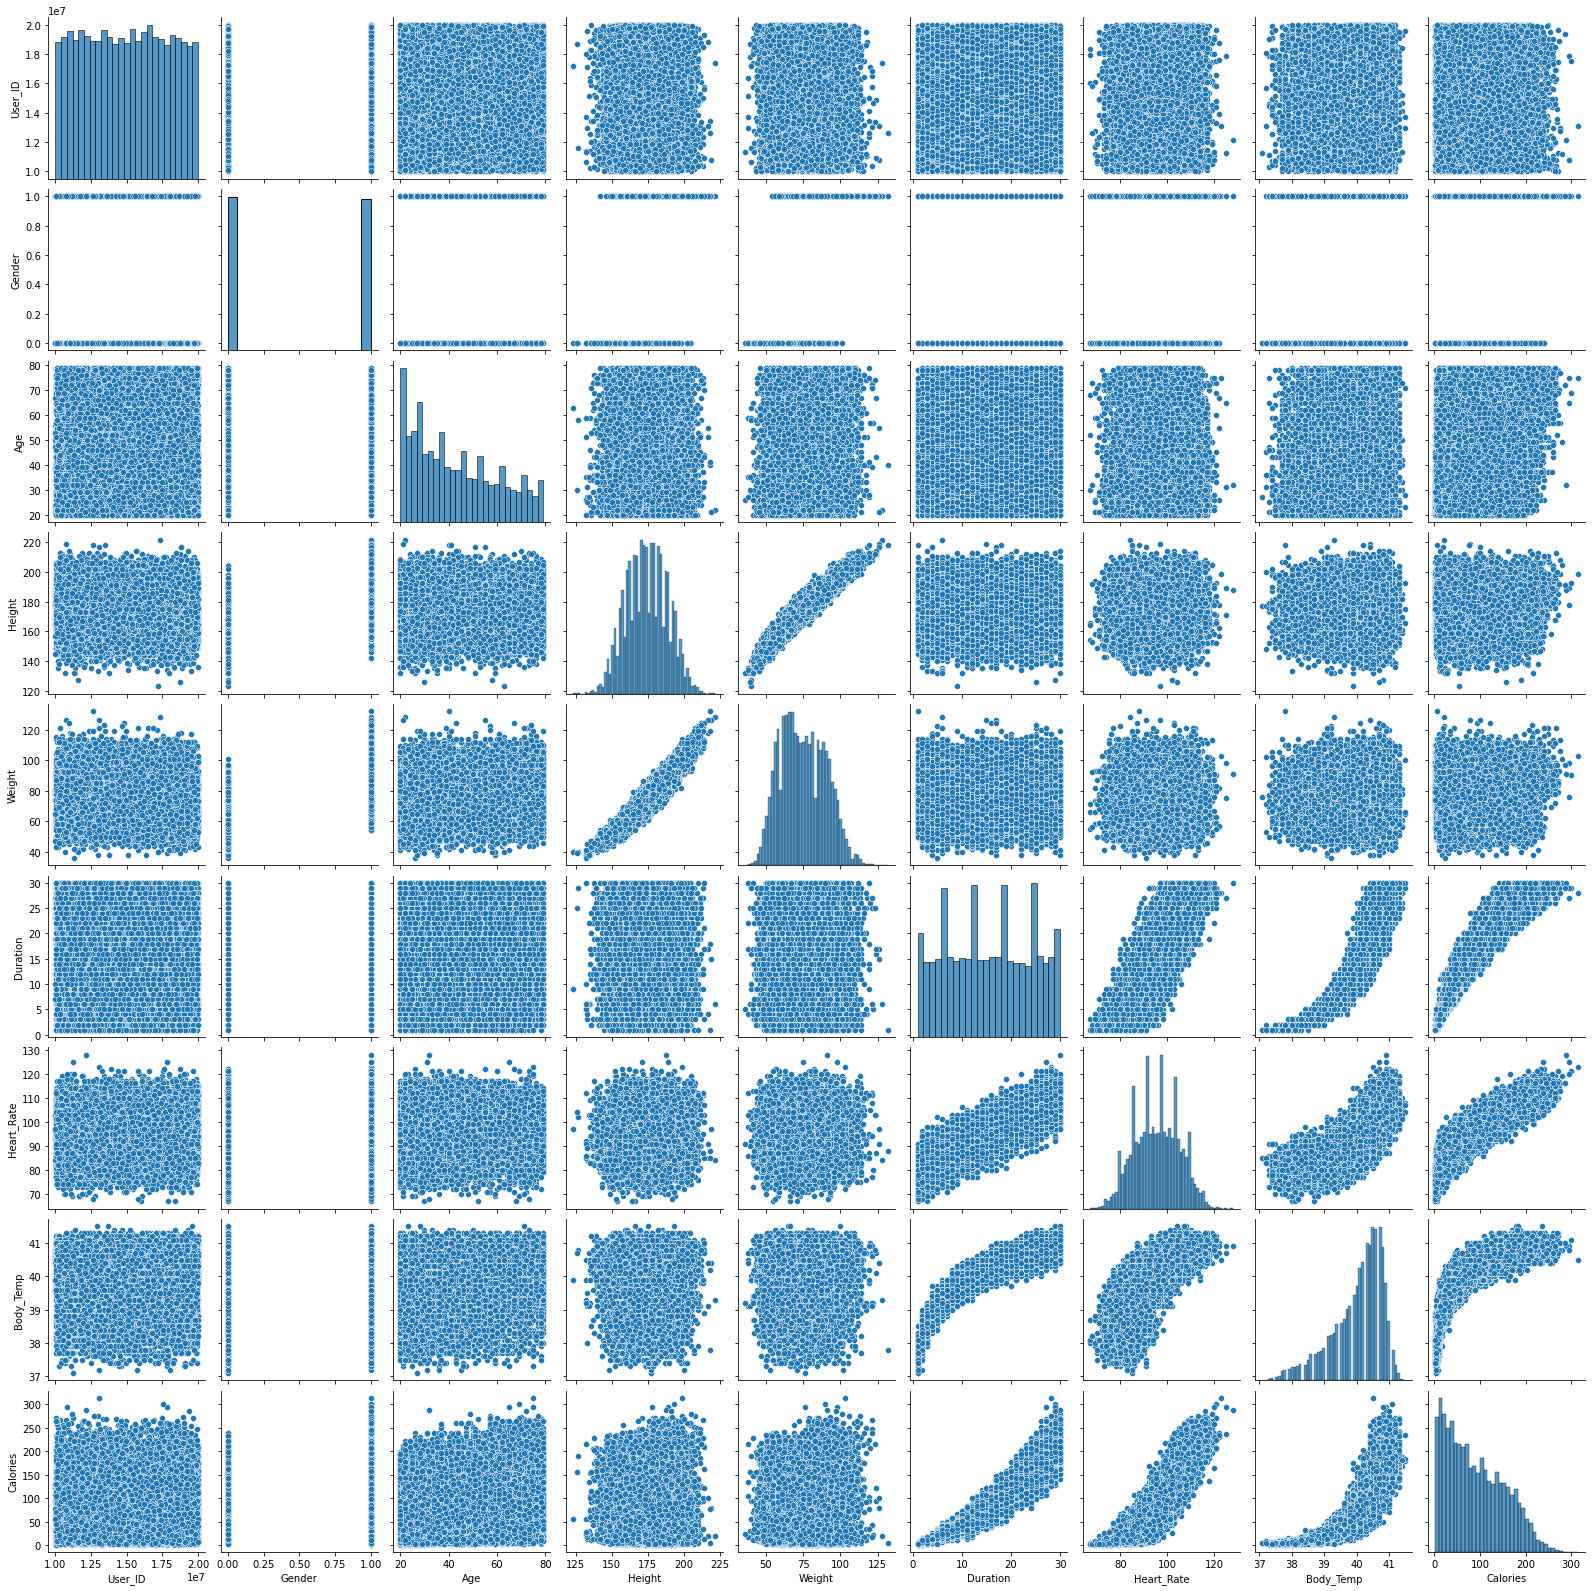

In [23]:
sns.pairplot(data,kind = "scatter")

C:\Users\Sid Shigwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

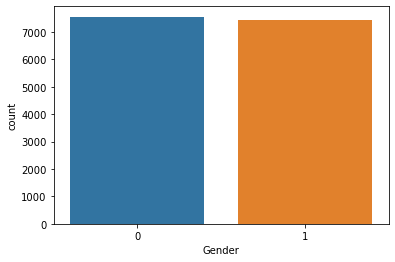

In [24]:
# plotting the gender column in count plot
sns.countplot(data['Gender'])

C:\Users\Sid Shigwan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

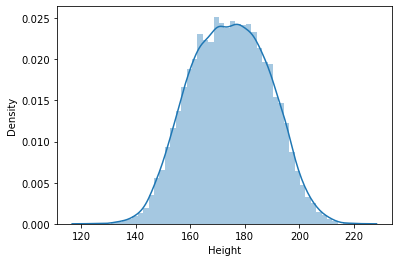

In [25]:
# finding the distribution of "Height" column
sns.distplot(data['Height'])

C:\Users\Sid Shigwan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

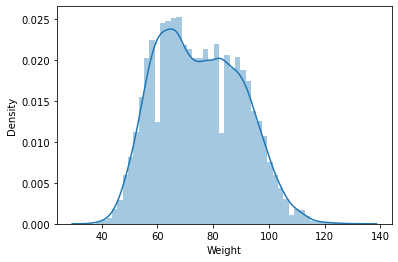

In [26]:
# finding the distribution of "Weight" column
sns.distplot(data['Weight'])

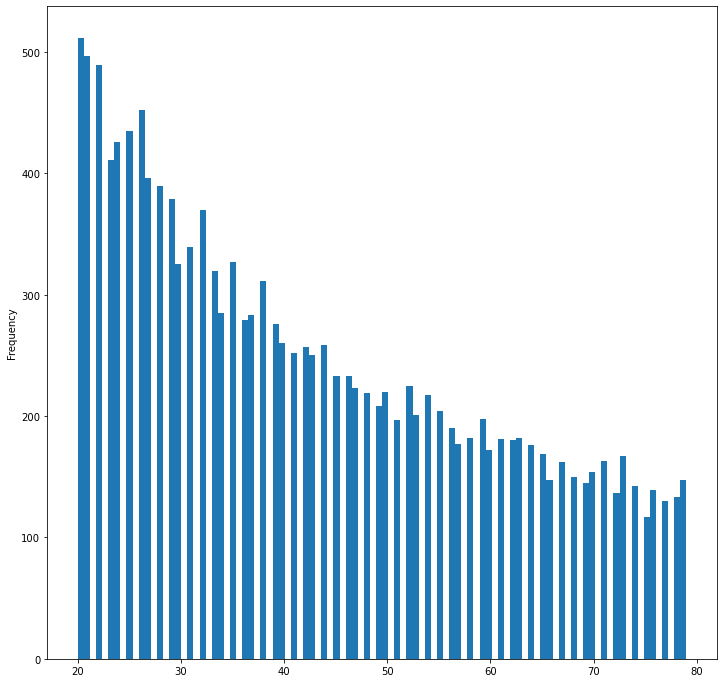

In [27]:
data.Age.plot(kind = 'hist', bins = 100, figsize = (12,12))
plt.show()

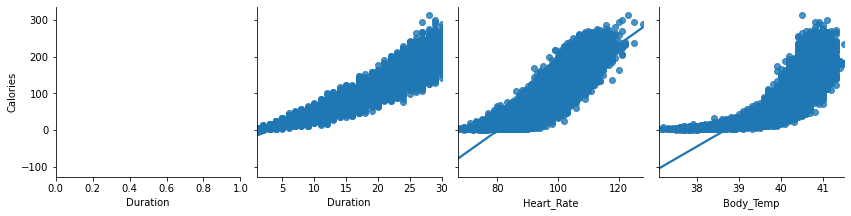

In [28]:
sns.pairplot(data,x_vars=['Duration','Duration','Heart_Rate','Body_Temp'],y_vars="Calories",height=3,aspect=1,kind="reg")

In [29]:
c_data =pd.DataFrame.copy(data)

# Split data into two parts for Training & Testing

In [30]:
X = data.drop(columns=['User_ID','Calories'], axis=1)
Y = data['Calories']
from sklearn.model_selection import train_test_split



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
random_state=10)

In [31]:
print(X_test)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
13983       0   55   159.0    63.0       6.0        85.0       39.2
822         0   42   157.0    55.0      27.0       113.0       40.9
13752       0   68   175.0    69.0       8.0        97.0       40.1
9656        1   46   189.0    98.0      14.0       100.0       40.3
13497       0   27   161.0    59.0      16.0        89.0       40.7
...       ...  ...     ...     ...       ...         ...        ...
9719        1   38   176.0    85.0      11.0        92.0       39.8
3248        0   45   169.0    66.0      19.0        97.0       40.5
1208        0   22   173.0    67.0      17.0        95.0       40.6
1564        1   49   188.0    88.0      19.0        98.0       40.0
13041       0   22   159.0    58.0      15.0        94.0       40.3

[3750 rows x 7 columns]


# Creating Model

## Linear Regression Model

In [32]:
## Create new data frame for changes

c_data =pd.DataFrame.copy(data)

In [33]:
X=c_data[["Age","Duration",'Heart_Rate','Body_Temp']]
Y=c_data['Calories']
from sklearn.model_selection import train_test_split



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
random_state=10)

In [34]:
from sklearn.linear_model import LinearRegression

## Creationg A model Object

lm=LinearRegression()


## Train the model object
lm.fit(X_train, Y_train)


## Print LR line equation by printing Itercepts and Coefeeficient
print(lm.intercept_)
print(lm.coef_)

455.1667195537279
[  0.52435495   6.63643208   1.98952911 -17.01851089]


In [37]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 25.80918185 185.13298787  54.45634991 ...  77.57559733 121.18573896
  67.41875733]


In [38]:
predli =pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
predli

,Actual,Predicted
13983,26.0,25.809182
822,194.0,185.132988
13752,46.0,54.456350
9656,87.0,85.304019
13497,69.0,59.921914
...,...,...
9719,48.0,53.792905
3248,102.0,108.589535
1208,81.0,77.575597
1564,112.0,121.185739


### Evaluating Model

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

lmr2=r2_score(Y_test,Y_pred)
print(lmr2)

lmrmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(lmrmse)

lmadjusted_r_squared = 1 - (1-lmr2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(lmadjusted_r_squared)


0.9661412115799193
11.510019392075506
0.9661321795590003


 # Split data

In [40]:
X = data.drop(columns=['User_ID','Calories'], axis=1)
Y = data['Calories']
from sklearn.model_selection import train_test_split



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
random_state=10)

## Decision Tree Regressor Model

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=10)

In [42]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=10)

In [43]:
y_pred = dt.predict(X_test)

In [44]:
dtr2=r2_score(Y_test,Y_pred)
print(dtr2)

dtrmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(dtrmse)

dtadjusted_r_squared = 1 - (1-dtr2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(dtadjusted_r_squared)

0.9661412115799193
11.510019392075506
0.9661254023804169


In [45]:
preddt =pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
preddt

,Actual,Predicted
13983,26.0,25.0
822,194.0,193.0
13752,46.0,45.0
9656,87.0,88.0
13497,69.0,69.0
...,...,...
9719,48.0,47.0
3248,102.0,96.0
1208,81.0,80.0
1564,112.0,116.0


## Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [47]:
rfr2=r2_score(Y_test,Y_pred)
print(rfr2)

rfrmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rfrmse)

rfadjusted_r_squared = 1 - (1-rfr2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(rfadjusted_r_squared)

0.9661412115799193
11.510019392075506
0.9661254023804169


In [48]:
y_pred_rf = rf.predict(X_test)
rf_pred =pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred_rf})
rf_pred

,Actual,Predicted
13983,26.0,25.35
822,194.0,194.29
13752,46.0,46.08
9656,87.0,86.68
13497,69.0,68.15
...,...,...
9719,48.0,48.07
3248,102.0,101.18
1208,81.0,80.61
1564,112.0,110.74


## XGBoost Regressor

In [49]:
from xgboost import XGBRegressor

In [50]:
xg=XGBRegressor()


## Train the model object
xg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
Y_pred=xg.predict(X_test)

### Evaluating Model

In [52]:
xgr2=r2_score(Y_test,Y_pred)
print(xgr2)

xgrmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(xgrmse)

xgadjusted_r_squared = 1 - (1-xgr2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(xgadjusted_r_squared)

0.9987266914879875
2.232066707200996
0.9987260969602672


In [53]:
y_pred_xg = xg.predict(X_test)
xg_pred =pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred_rf})
xg_pred

,Actual,Predicted
13983,26.0,25.35
822,194.0,194.29
13752,46.0,46.08
9656,87.0,86.68
13497,69.0,68.15
...,...,...
9719,48.0,48.07
3248,102.0,101.18
1208,81.0,80.61
1564,112.0,110.74


# Comparing Accucuracy in Model

In [54]:
df = pd.DataFrame([[lmr2,dtr2,rfr2,xgr2],[lmrmse,dtrmse,rfrmse,xgrmse],[lmadjusted_r_squared,dtadjusted_r_squared,rfadjusted_r_squared,xgadjusted_r_squared]]).T

In [55]:
df.columns = ['Accuracy','RMSE',"AMSE"]
df.index = ["Linear Regression",'Decision Tree','Random Forest','XG Boost']

In [56]:
df

,Accuracy,RMSE,AMSE
Linear Regression,0.966141,11.510019,0.966132
Decision Tree,0.966141,11.510019,0.966125
Random Forest,0.966141,11.510019,0.966125
XG Boost,0.998727,2.232067,0.998726
